In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
from vega_datasets import data

## Get Data

In [7]:
df_gpm_lxp = data.gapminder()
df_gpm_lxp.head()

,year,country,cluster,pop,life_expect,fertility
0,1955,Afghanistan,0,8891209,30.332,7.7
1,1960,Afghanistan,0,9829450,31.997,7.7
2,1965,Afghanistan,0,10997885,34.020,7.7
3,1970,Afghanistan,0,12430623,36.088,7.7
4,1975,Afghanistan,0,14132019,38.438,7.7


## The most basic Chart

- Super quick to make

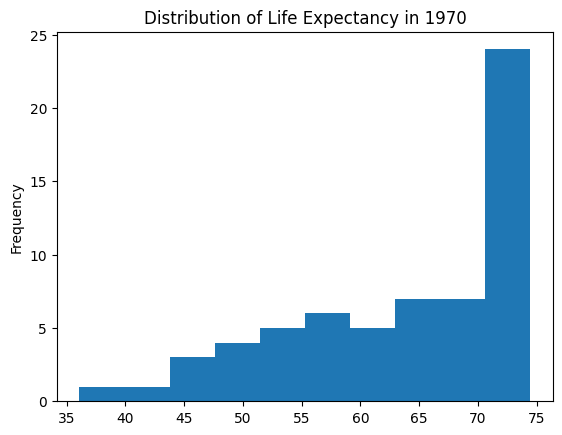

In [9]:
(df_gpm_lxp
 .set_index('year')
 .loc[1970, 'life_expect']
 .plot.hist(title='Distribution of Life Expectancy in 1970')
);

## Plot Options

We can easily change aspects of a chart using mostly self-explanatory options, such as
- color
- alpha (for transparency)
- grid
- legend
- xlim (set min and max on the x-axis)
- figsize (set the size of the plot)
- fontsize
- xticks (set the numbers displayed on the x-axis)

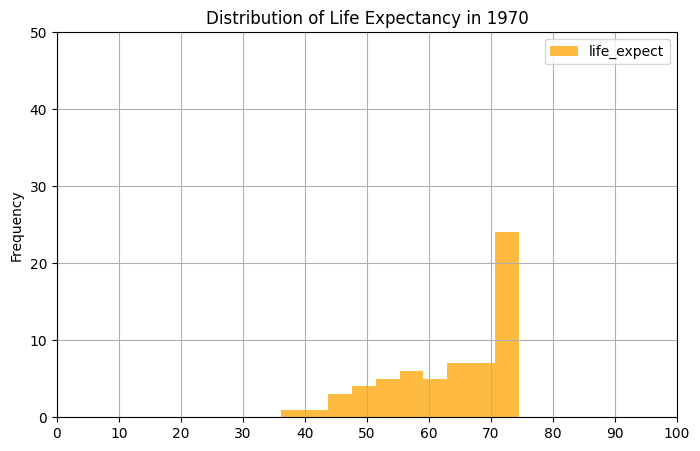

In [11]:
(df_gpm_lxp
 .set_index('year')
 .loc[1970, 'life_expect']
 .plot
 .hist(
     title='Distribution of Life Expectancy in 1970', 
     color='orange', 
     alpha=0.75, 
     grid=True, 
     legend=True, 
     xlim=(0, 100), 
     figsize=(8, 5), 
     fontsize=10, 
     xticks=range(0, 101, 10), 
     yticks=range(0, 51, 10))
);

In [13]:
def make_simple_histogram():
    """
    """
    ax = \
    (df_gpm_lxp
     .set_index('year')
     .loc[1970, 'life_expect']
     .plot
     .hist(
         title='Distribution of Life Expectancy in 1970', 
         color='orange', 
         alpha=0.75, 
         grid=True, 
         legend=True, 
         xlim=(0, 100), 
         figsize=(8, 5), 
         fontsize=10, 
         xticks=range(0, 101, 10), 
         yticks=range(0, 51, 10))
    )
    return ax

<br>

## Making Publication Quality Charts

- This is because we're using the `classic` style
- We can use Seaborn's **styles** and **context** options for good looking presets

Further, we can work with the `ax` object to get and set options for many aspects of the chart
- Remove Spines
- Modify the Grid
- Change fonts
- Change Labels for the axes
- Add vertical or horizontal lines to represent metrics like averages
- Annotate (place text) anywhere on the chart as a 'callout'

<br>

In [12]:
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")
# try: plt.style.available

sns.set_context("notebook")
# try: poster, talk

''

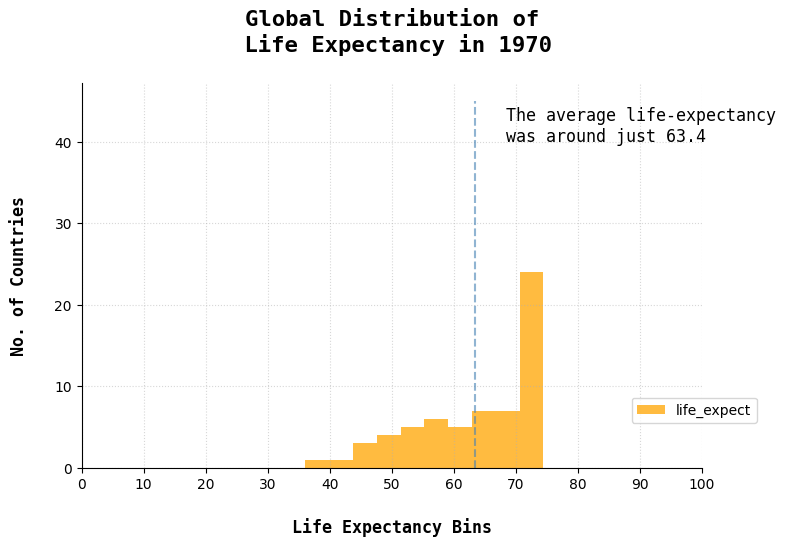

In [20]:
# make the plot
ax = make_simple_histogram()

# remove extra spines
sns.despine(ax=ax)

# make the grid lighter
ax.grid(True, linestyle=":", alpha=0.5)



font_title = {
    'size': 16, 
    'weight': 'bold', 
    'name': 'monospace'
}

font_axes = {
    'size': 12, 
    'weight': 'bold', 
    'name': 'monospace'
}

# add a label to the axes
ax.set_title("Global Distribution of\n Life Expectancy in 1970\n", fontdict=font_title)
ax.set_xlabel("\nLife Expectancy Bins", fontdict=font_axes)
ax.set_ylabel("No. of Countries\n", fontdict=font_axes)

# move the legend outside
if ax.get_legend():
    ax.legend(bbox_to_anchor=(1.1, 0.2))

# Calculate MEAN Life Expectancy
avg_life_expectancy =  \
(df_gpm_lxp
 .set_index('year')
 .loc[1970, 'life_expect']
 .mean()
 .round(1))    
    
# add a vertical line
ax.vlines(x=avg_life_expectancy, 
          ymin=0, 
          ymax=45, 
          color='steelblue', 
          linestyle='dashed', 
          alpha=0.6)
    
# annotate
ax.text(x=avg_life_expectancy + 5,
        y=40, 
        s=f"The average life-expectancy\nwas around just {avg_life_expectancy}" ,
        fontdict={'name': 'monospace', 'size': 12})
;

### Let's keep the useful bits in a function for re-use

This allows you to apply your styles to any chart you create

In [27]:
def format_plot(ax):
    """
    """
    sns.set_style("whitegrid")
    
    font_title = {
        'size': 16, 
        'weight': 'bold', 
        'name': 'monospace'
    }

    font_axes = {
        'size': 14, 
        'weight': 'bold', 
        'name': 'monospace'
    }

    ax.grid(True, linestyle=":", alpha=0.6)
    sns.despine(ax=ax)

    if ax.get_legend():
        ax.legend(bbox_to_anchor=(1.1, 1))
    
    ax.set_title(f"\n\n{ax.get_title()}\n", fontdict=font_title)
    ax.set_xlabel(f"\n{ax.get_xlabel().replace('_', ' ').upper()} ➞", fontdict=font_axes)
    ax.set_ylabel(f"{ax.get_ylabel().replace('_', ' ').upper()} ➞\n", fontdict=font_axes)

## Make a new plot using defaults

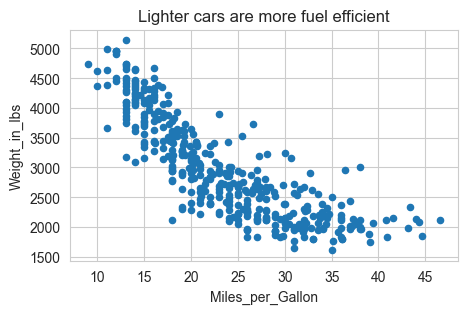

In [42]:
data.cars().plot.scatter(x='Miles_per_Gallon', y='Weight_in_lbs', figsize=(5, 3), title="Lighter cars are more fuel efficient");

## Use the `format_plot` function to improve it

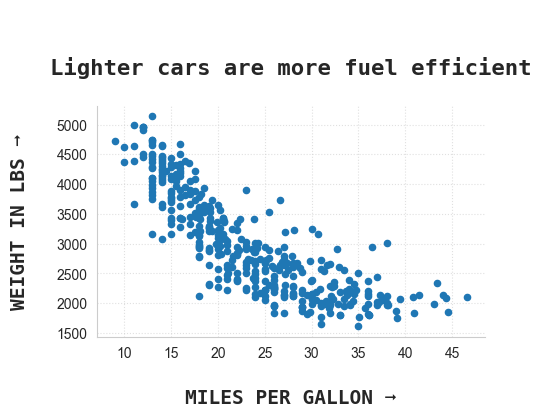

In [41]:
ax = data.cars().plot.scatter(x='Miles_per_Gallon', y='Weight_in_lbs', figsize=(5, 3), title="Lighter cars are more fuel efficient")
format_plot(ax)